# Modelos de Regressão

* Regressão Linear Simples:

$$ y = a + b x $$

a - Viéas.

b - Bias.

In [38]:
# Importando dados com pandas
import pandas as pd

# Importando os dados para o estudo

df = pd.read_csv('data/pesos.csv')
df.head()

,Idade,Peso
0,0,3.44
1,1,4.39
2,2,4.49
3,3,4.78
4,4,5.23


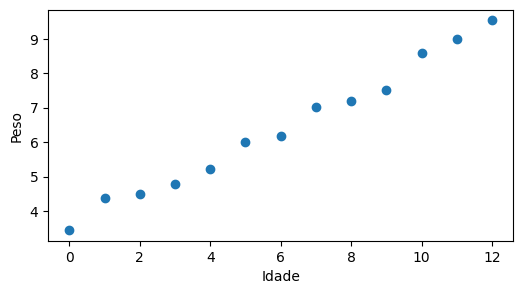

In [39]:
# Graficamente
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.scatter(df.Idade, df.Peso)
plt.xlabel('Idade')
plt.ylabel('Peso')
plt.show()

In [40]:
# Tentaremos escrever um modelo de regressão linear de forma manual
# Considerando os primeiros dados
df.head(4)

,Idade,Peso
0,0,3.44
1,1,4.39
2,2,4.49
3,3,4.78


In [41]:
# Assim:
deltaX = 3-0
deltaY = 4.78 - 3.44

b = deltaY/deltaX
b

0.44666666666666677

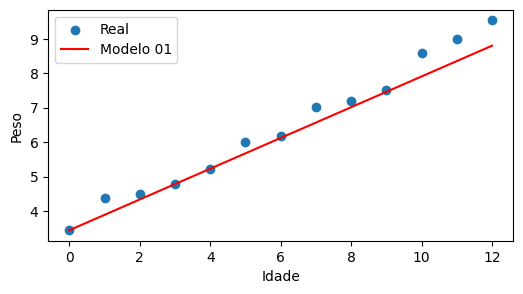

In [42]:
# Agora que temos nosso coeficiente angulas (Bias), precisamos do intecepto (Viés)
# Assumindo que conhecemos b, podemos calcular a aplicando algum ponto conhecido

# y = a + bx
# y = a + 0.44666666666666677 x

# Escolhendo o primeiro ponto onde x = 0 e y = 3.44, temos:
# 3.44 = a + 0.4666 * 0
# Logo, a = 3.44 e o nosso modelo é:
# y = 3.44 + 0.44666666666666677 x

# Graficamente:
import numpy as np
y = 3.44 + 0.44666666666666677*df.Idade

plt.figure(figsize=(6,3))
plt.scatter(df.Idade, df.Peso, label = 'Real')
plt.plot(df.Idade,y, color = 'red',label = 'Modelo 01')
plt.xlabel('Idade')
plt.ylabel('Peso')
plt.legend()
plt.show()

Encontramos o seguinte resultado:

$$ y = y = 3.44 + 0.44666666666666677x $$

Precisamos acrescentar o possível erro entre dados reais e preditos:

$$ y = y = 3.44 + 0.44666666666666677x + erro$$

Percebemos que apesar de o resultado acima ser satisfatório, não buscamos o melhor resultado possível considerando todos os dados do dataset. Aplicaremos o método dos mínimos quadrados.

* Método dos mínimos quadrados:

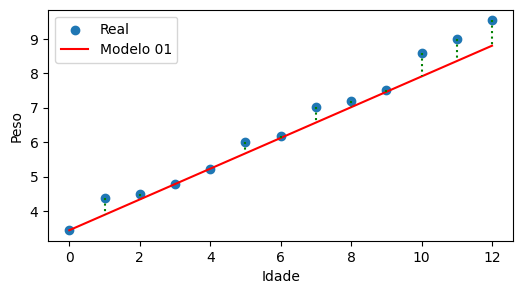

In [43]:
plt.figure(figsize=(6,3))
plt.scatter(df.Idade, df.Peso, label = 'Real')
plt.plot(df.Idade,y, color = 'red',label = 'Modelo 01')
plt.xlabel('Idade')
plt.ylabel('Peso')
plt.legend()

for xi, yi, ypi in zip(df.Idade, df.Peso, y):
    plt.plot([xi, xi], [yi, ypi], color='green', linestyle='dotted')

plt.show()

Visando minimizar os minimos quadrados:

$$ min \sum _{i=1} ^n (y_i - y_i^{calc})^2$$

Assim, quando encontramos o minimo valor da função objetivo, teremos os parâmetros que melhor ajustam a reta aos dados reais.

Para verificar a eficiência da predição calculada, podemos verificar as seguinte métricas:
1. Coeficiente de determinção $R^2$
2. Erro padrão da estimativa

O coeficiente de determinação indica o quanto a variação dos valores preditos consegue predizer a variação da variável real.

In [44]:
# Caluclo o modelo aplicando STATMODELS

import statsmodels.formula.api as st

In [46]:
estimativa = st.ols(formula = 'Peso ~ Idade', data = df)
model = estimativa.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     774.9
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.50e-11
Time:                        00:55:56   Log-Likelihood:                 1.3432
No. Observations:                  13   AIC:                             1.314
Df Residuals:                      11   BIC:                             2.444
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4737      0.124     27.937      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


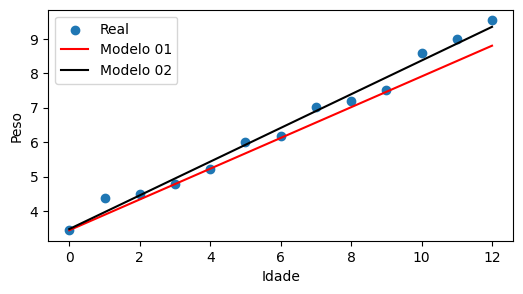

In [47]:
y2 = 3.4737 + 0.4895*df.Idade

plt.figure(figsize=(6,3))
plt.scatter(df.Idade, df.Peso, label = 'Real')
plt.plot(df.Idade,y, color = 'red',label = 'Modelo 01')
plt.plot(df.Idade,y2, color = 'black',label = 'Modelo 02')
plt.xlabel('Idade')
plt.ylabel('Peso')
plt.legend()
plt.show()

In [48]:
# Criando um modelo de regressão 

df2 = pd.read_csv('data/pesos2.csv')
df2.head()

,Sexo,Grupo,Head Size,Brain Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [49]:
# Queremos estimar o peso do cerebro em função dos demais parâmetros

X = df2['Head Size'].values
Y = df2['Brain Weight'].values

In [53]:
# Passo 01
# Cálculo de mésias
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Número de valores
n = len(X)

# Iniciando os valores de a e b
num = 0
den = 0

# Ajustando valores de a e b
for i in range(n):
    num += (X[i]-x_mean)*(Y[i]-y_mean)
    den +=  (X[i]-x_mean)**2

b = num/den
a = y_mean - (b*x_mean)

a, b 


(325.57342104944223, 0.26342933948939945)

Temos o seguinte resultado:

$$ f(x) = 0.26342933948939945x + 325.57342104944223 $$ 

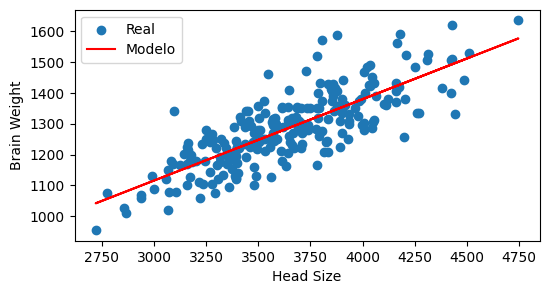

In [55]:
# Verificando graficamente
y = 325.57342104944223 + 0.26342933948939945*X

plt.figure(figsize=(6,3))
plt.scatter(X, Y, label = 'Real')
plt.plot(X,y, color = 'red',label = 'Modelo')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.legend()
plt.show()

In [57]:
# Para o coeficiente de determinação

sse = np.sum((Y - y) ** 2)  # Soma dos quadrados dos erros (resíduos)
sst = np.sum((Y - np.mean(Y)) ** 2) # Soma total dos quadrados

R2 = 1 - sse/sst

# Cálculo do erro padrão de estimativa
n = len(y)
epe = np.sqrt(sse / (n - 2))

R2, epe

(0.639311719957, 72.42686743269371)